In [9]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/fetch/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/fetch/'
/content/gdrive/MyDrive/fetch


In [10]:
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

# Converting from JSON Files to Dataframes

In [11]:
receipts_df = pd.read_json('receipts.json', lines=True)
receipts_df = receipts_df.explode('rewardsReceiptItemList')
receipts_df.reset_index(inplace=True)
receipts_df['_id'] = receipts_df['_id'].apply(lambda x: x['$oid'])
date_fields = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']
for date_field in date_fields:
    receipts_df[date_field] = receipts_df[date_field].apply(lambda x: pd.to_datetime(x['$date'], unit='ms') if pd.notnull(x) else pd.NaT)
if 'rewardsReceiptItemList' in receipts_df.columns:
    nested_columns = json_normalize(receipts_df['rewardsReceiptItemList'].dropna())
    nested_columns.columns = [f'rewardsReceiptItemList_{col}' for col in nested_columns.columns]
    receipts_df = receipts_df.drop(columns=['rewardsReceiptItemList']).reset_index(drop=True)
    receipts_df = pd.concat([receipts_df, nested_columns], axis=1)

In [12]:
receipts_df.head()

,index,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,...,rewardsReceiptItemList_itemNumber,rewardsReceiptItemList_originalMetaBriteQuantityPurchased,rewardsReceiptItemList_pointsEarned,rewardsReceiptItemList_targetPrice,rewardsReceiptItemList_competitiveProduct,rewardsReceiptItemList_originalFinalPrice,rewardsReceiptItemList_originalMetaBriteItemPrice,rewardsReceiptItemList_deleted,rewardsReceiptItemList_priceAfterCoupon,rewardsReceiptItemList_metabriteCampaignId
0,0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
users_df = pd.read_json('users.json', lines=True)
print(len(users_df))
users_df['_id'] = users_df['_id'].apply(lambda x: x['$oid'])
users_df['createdDate'] = users_df['createdDate'].apply(lambda x: pd.to_datetime(x['$date'], unit='ms') if pd.notnull(x) else pd.NaT)
users_df['lastLogin'] = users_df['lastLogin'].apply(lambda x: pd.to_datetime(x['$date'], unit='ms') if pd.notnull(x) else pd.NaT)
users_df.head()

495


,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.554,2021-01-03 15:25:30.597,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.858,consumer,Email,WI


In [14]:
brands_df = pd.read_json('brands.json', lines=True)

brands_df['_id'] = brands_df['_id'].apply(lambda x: x['$oid'])

if 'cpg' in brands_df.columns:
    nested_columns = json_normalize(brands_df['cpg'].dropna())
    nested_columns.columns = [f'cpg_{col}' for col in nested_columns.columns]
    brands_df = brands_df.drop(columns=['cpg']).reset_index(drop=True)
    brands_df = pd.concat([brands_df, nested_columns], axis=1)
brands_df.rename(columns={'cpg_$ref': 'cpg_ref'}, inplace=True)
brands_df.rename(columns={'cpg_$id.$oid': 'cpg_id'}, inplace=True)

brands_df.head()


,_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_ref,cpg_id
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,Cogs,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,Cogs,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,Cogs,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,Cogs,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,Cogs,5332fa12e4b03c9a25efd1e7


#Checking for Completeness and Uniqueness

In [15]:
def check_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    total_values = len(df)
    missing_percentage = (missing_values / total_values) * 100

    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentage
    })

    print(f"Missing values in {df_name}:\n{missing_data}\n")

def check_duplicates(df, df_name):
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows in {df_name}: {duplicates}\n")
    if duplicates > 0:
        duplicate_counts = df[df.duplicated()]

def visualize_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    total_values = len(df)
    missing_percentage = (missing_values / total_values) * 100

    zero_missing_count = (missing_percentage == 0).sum()

    missing_percentage = missing_percentage[missing_percentage > 0]

    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
    missing_bands = pd.cut(missing_percentage, bins=bins, labels=labels, right=False)

    band_counts = missing_bands.value_counts().sort_index()

    band_counts['0%'] = zero_missing_count

    band_counts = band_counts.sort_index()

    plt.figure(figsize=(10, 6))
    band_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Number of Columns')
    plt.title(f'Missing Values Percentage Bands for {df_name}')
    plt.xticks(rotation=45)
    plt.yticks(range(0, max(band_counts) + 1))
    plt.show()


Evaluating receipts_df...
Missing values in receipts_df:
                                                    Missing Values  \
index                                                            0   
_id                                                              0   
bonusPointsEarned                                             1401   
bonusPointsEarnedReason                                       1401   
createDate                                                       0   
dateScanned                                                      0   
finishedDate                                                  1411   
modifyDate                                                       0   
pointsAwardedDate                                             1301   
pointsEarned                                                  1128   
purchaseDate                                                   458   
purchasedItemCount                                             484   
rewardsReceiptStatus             

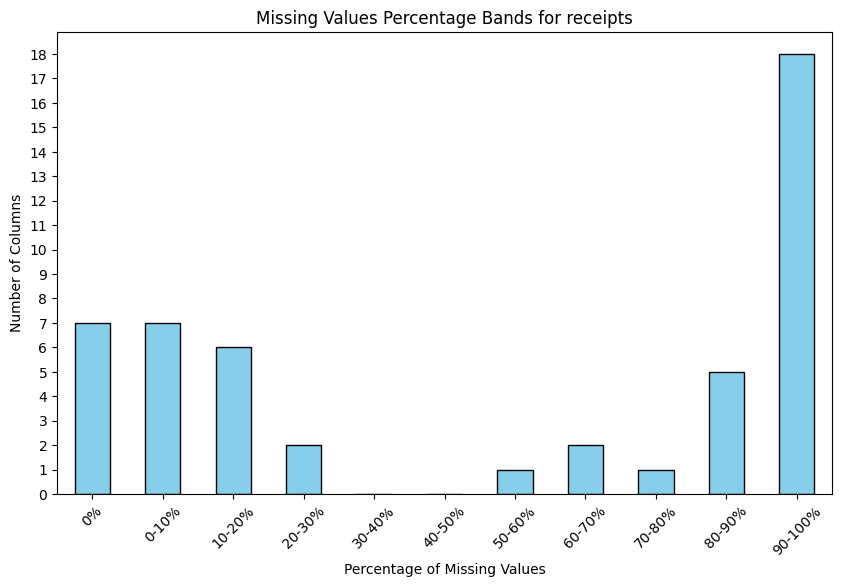

In [16]:

print("Evaluating receipts_df...")
check_missing_values(receipts_df, "receipts_df")
check_duplicates(receipts_df, "receipts_df")
visualize_missing_values(receipts_df, "receipts")


Evaluating users_df...
Missing values in users_df:
              Missing Values  Missing Percentage
_id                        0            0.000000
active                     0            0.000000
createdDate                0            0.000000
lastLogin                 62           12.525253
role                       0            0.000000
signUpSource              48            9.696970
state                     56           11.313131

Duplicate rows in users_df: 283



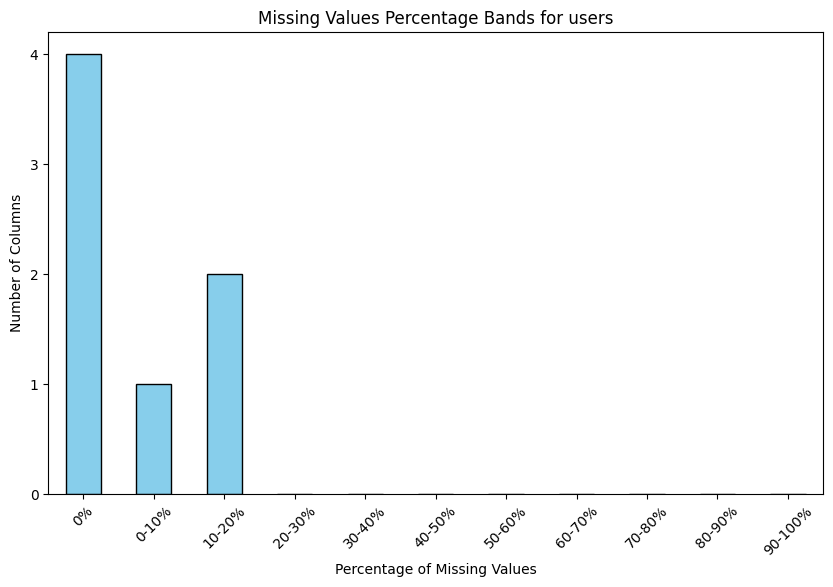

In [17]:
print("Evaluating users_df...")
check_missing_values(users_df, "users_df")
check_duplicates(users_df, "users_df")
visualize_missing_values(users_df, "users")


Evaluating brands_df...
Missing values in brands_df:
              Missing Values  Missing Percentage
_id                        0            0.000000
barcode                    0            0.000000
category                 155           13.281919
categoryCode             650           55.698372
name                       0            0.000000
topBrand                 612           52.442159
brandCode                234           20.051414
cpg_ref                    0            0.000000
cpg_id                     0            0.000000

Duplicate rows in brands_df: 0



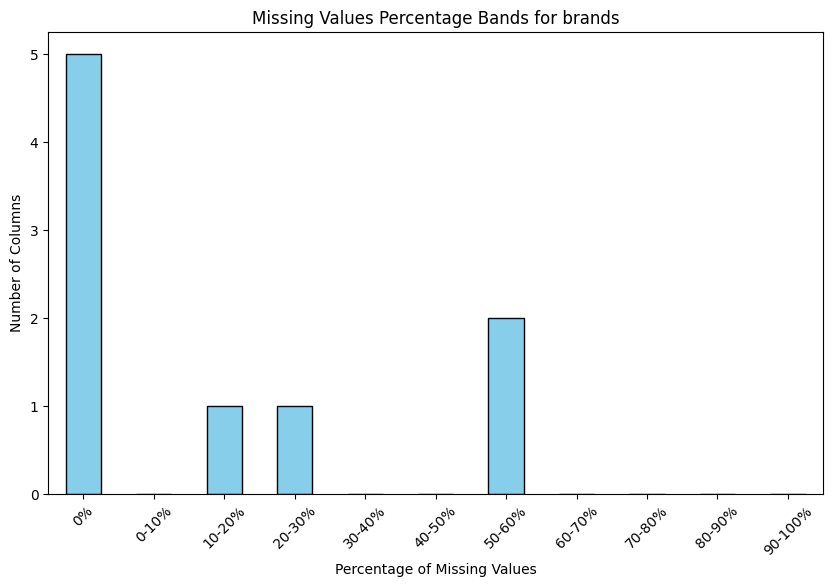

In [18]:
print("Evaluating brands_df...")
check_missing_values(brands_df, "brands_df")
check_duplicates(brands_df, "brands_df")
visualize_missing_values(brands_df, "brands")

#Checking for Consistency

In [19]:
def check_brandcode_presence(receipts_df, brands_df):
    brand_codes_in_receipts = set(receipts_df['rewardsReceiptItemList_brandCode'].dropna())
    brand_codes_in_brands = set(brands_df['brandCode'].dropna())

    missing_brand_codes = brand_codes_in_receipts - brand_codes_in_brands
    missing_count = len(missing_brand_codes)

    print(f"Number of brand codes in receipts not present in brands: {missing_count}")
    print("Unique Brand Codes in brands:", len(brand_codes_in_brands))
    print("Unique Brand Codes in receipts:", len(brand_codes_in_receipts))
check_brandcode_presence(receipts_df, brands_df)


Number of brand codes in receipts not present in brands: 186
Unique Brand Codes in brands: 897
Unique Brand Codes in receipts: 227


In [20]:
import pandas as pd

def check_barcode_presence(receipts_df, brands_df):
    barcodes_in_receipts = set(receipts_df['rewardsReceiptItemList_barcode'].dropna())
    tmp = set(brands_df['barcode'].dropna())
    barcodes_in_brands = set()
    for i in tmp:
      barcodes_in_brands.add(str(i))
    print("Unique Barcodes in brands:", len(barcodes_in_brands))
    print("Unique Barcodes in receipts:", len(barcodes_in_receipts))
    missing_barcodes =  barcodes_in_receipts - barcodes_in_brands
    missing_count = len(missing_barcodes)

    print(f"Number of barcodes in receipts not present in brands: {missing_count}")

check_barcode_presence(receipts_df, brands_df)


Unique Barcodes in brands: 1160
Unique Barcodes in receipts: 568
Number of barcodes in receipts not present in brands: 552


In [21]:
import pandas as pd

def find_cpg_id_with_multiple_cpg_ref(brands_df):
    grouped = brands_df.groupby('cpg_id')['cpg_ref'].nunique()

    multiple_cpg_ref = grouped[grouped > 1]

    if not multiple_cpg_ref.empty:
        print("cpg_id values with more than one cpg_ref:")
        for cpg_id in multiple_cpg_ref.index:
            cpg_refs = brands_df[brands_df['cpg_id'] == cpg_id]['cpg_ref'].unique()
            print(f"cpg_id: {cpg_id} has cpg_refs: {list(cpg_refs)}")
    else:
        print("No cpg_id values with multiple cpg_ref found.")

find_cpg_id_with_multiple_cpg_ref(brands_df)


cpg_id values with more than one cpg_ref:
cpg_id: 5332f5f3e4b03c9a25efd0ae has cpg_refs: ['Cpgs', 'Cogs']
cpg_id: 5332f5fbe4b03c9a25efd0ba has cpg_refs: ['Cogs', 'Cpgs']
cpg_id: 5332f709e4b03c9a25efd0f1 has cpg_refs: ['Cpgs', 'Cogs']
cpg_id: 5332f7a7e4b03c9a25efd134 has cpg_refs: ['Cogs', 'Cpgs']
cpg_id: 5332fa12e4b03c9a25efd1e7 has cpg_refs: ['Cogs', 'Cpgs']
cpg_id: 53e10d6368abd3c7065097cc has cpg_refs: ['Cpgs', 'Cogs']
cpg_id: 5459429be4b0bfcb1e864082 has cpg_refs: ['Cpgs', 'Cogs']
cpg_id: 55b62995e4b0d8e685c14213 has cpg_refs: ['Cogs', 'Cpgs']
